## Analysis of AI documents and papers citation graph

In [2]:
import pandas as pd
citation_matches_df = pd.read_csv("../../data/citation_graph/documents_references.csv", index_col=0, dtype={"id_source": str})

In [3]:
citation_matches_confident = citation_matches_df[citation_matches_df['match_confidence'] == 1]

In [4]:
citation_matches_df.head(3)

,id_dest,id_source,doc_type,dest_title,source_title,dest_path,source_arxiv_url,match_type,matched_info,matched_text,match_confidence
0,15898,1803.10813,oecd,INDUSTRIAL STRATEGY: BUILDING A BRITAIN FIT FO...,Artificial Intelligence and Robotics,15898.txt,http://arxiv.org/abs/1803.10813,by_title,artificialintelligenceandrobotics,ficationofvehiclesandefficientuseofrenewableen...,0.8
1,26722,2009.09071,oecd,AI TASK FORCE,Measurement in AI Policy: Opportunities and Ch...,26722.txt,http://arxiv.org/abs/2009.09071,by_arxiv_id,2009.09071,"\n \nKohli, J, & Moody, C. (2016). What is a ...",1.0
2,26722,2009.09071,oecd,AI TASK FORCE,Measurement in AI Policy: Opportunities and Ch...,26722.txt,http://arxiv.org/abs/2009.09071,by_title,measurementinaipolicyopportunitiesandchallenges,tkualalampurmishrasclarkjperraultcr2020septemb...,1.0


### Questions to answer
* Number of documents
* Number of papers
* Number of edges in the graph
* Number of matches by type
* Number of documents/papers with any link
* Most frequently cited papers
* What are the entries matched by arxiv id but not the title

In [6]:
import os
import json
OECD_DOCUMENT_COUNT = len(os.listdir("../../data/oecd_docs/texts"))
NESTA_DOCUMENT_COUNT = len(os.listdir("../../data/nesta_ai_governance_docs/texts"))
ARXIV_PAPERS_COUNT = len(json.load(open("../../data/citation_graph/arxiv-ai-metadata.json", "r")))

print("OECD documents: {}".format(OECD_DOCUMENT_COUNT))
print("NESTA documents: {}".format(NESTA_DOCUMENT_COUNT))
print("ARXIV papers: {}".format(ARXIV_PAPERS_COUNT))

OECD documents: 84
NESTA documents: 102
ARXIV papers: 164105


In [8]:
citation_graph_df = citation_matches_confident[['id_dest', 'id_source', 'doc_type']].drop_duplicates()
LINKS_COUNT = citation_graph_df.shape[0]
print("Number of links: {}".format(LINKS_COUNT))

Number of links: 202


In [95]:
# citation_graph_df.to_csv("../../data/citation_graph/citations_graph.csv", index=False)

In [10]:
# Matches by type
citation_matches_confident['match_type'].value_counts()

by_title       172
by_arxiv_id    115
Name: match_type, dtype: int64

In [11]:
citation_matches_confident[['id_dest', 'doc_type']].drop_duplicates()[['doc_type']].value_counts()

doc_type
nesta       26
oecd        11
dtype: int64

In [12]:
citation_matches_confident[['id_dest', 'doc_type']].value_counts()

id_dest                                                                                            doc_type
the-malicious-use-of-ai-forecasting-prevention-and-mitigation                                      nesta       63
26961                                                                                              oecd        42
26955                                                                                              oecd        41
26746                                                                                              oecd        24
data-quality-and-artificial-intelligence-mitigating-bias-and-error-to-protect-fundamental-rights   nesta       10
algorithmic-accountability-in-low-and-middle-income-countries                                      nesta        9
ai-and-national-security                                                                           nesta        9
26950                                                                                         

In [13]:
paper_counts = citation_matches_confident[['id_source']].value_counts()

In [14]:
print("Number of cited papers: {}".format(len(paper_counts)))

Number of cited papers: 146


In [15]:
pd.DataFrame(paper_counts)

,0
id_source,
1606.06565,9
1711.00399,8
1702.08608,6
1511.06434,5
1810.03993,5
...,...
1710.04806,1
1710.08864,1
1710.10196,1


In [16]:
top_cited_papers_df = pd.merge(pd.DataFrame(paper_counts, columns=['count']).reset_index(), citation_matches_df[['id_source', 'source_title']].drop_duplicates(), 
         on='id_source', how='left')[['id_source', 'count', 'source_title']]

In [17]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None, 'display.max_colwidth', None, 'display.width', 300):  # more options can be specified also
    print(top_cited_papers_df[top_cited_papers_df['count'] > 2])

     id_source  count                                                                                                                               source_title
0   1606.06565      9                                                                                                             Concrete Problems in AI Safety
1   1711.00399      8                                             Counterfactual Explanations without Opening the Black Box: Automated\n  Decisions and the GDPR
2   1702.08608      6                                                                               Towards A Rigorous Science of Interpretable Machine Learning
3   1511.06434      5                                            Unsupervised Representation Learning with Deep Convolutional Generative\n  Adversarial Networks
4   1810.03993      5                                                                                                            Model Cards for Model Reporting
5   1705.08807      5             

#### Plot a graph

In [49]:
import networkx as nx
import json
import plotly.graph_objects as go
g = nx.Graph()

In [50]:
g.add_nodes_from(citation_graph_df['id_dest'])
g.add_nodes_from(citation_graph_df['id_source'])

In [51]:
pos = nx.layout.bipartite_layout(g, citation_graph_df['id_dest'])


In [52]:
g.add_edges_from(zip(citation_graph_df['id_dest'], citation_graph_df['id_source']))

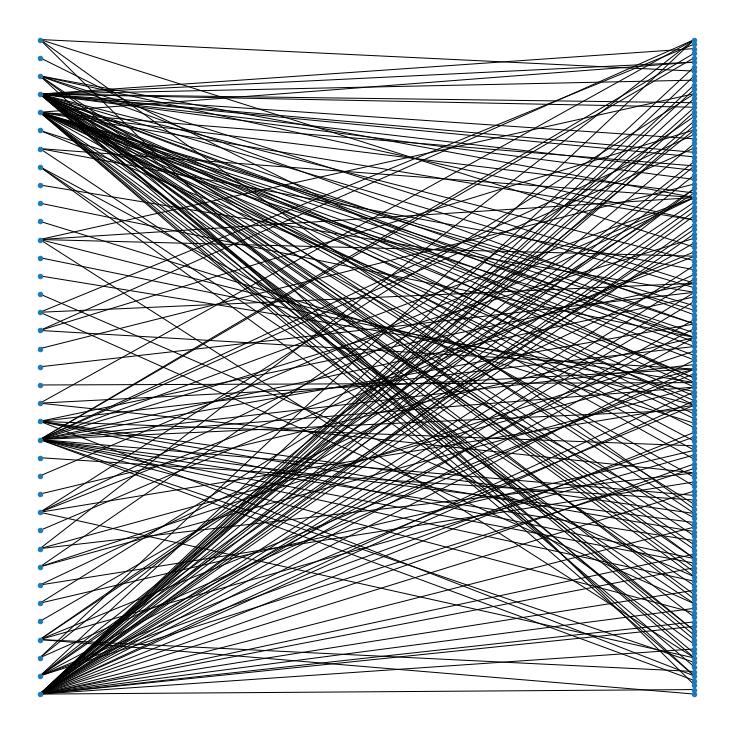

In [53]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
nx.draw(g, pos, node_size=20)

### Further matches analysis

In [90]:
arxiv_matched_pairs = citation_matches_confident[citation_matches_confident['match_type'] == "by_arxiv_id"][['id_dest', 'id_source', 'source_title']]

In [91]:
title_matched_pairs = citation_matches_confident[citation_matches_confident['match_type'] == "by_title"][['id_dest', 'id_source', 'match_type']]

In [92]:
merged = pd.merge(arxiv_matched_pairs, title_matched_pairs, how='left')

In [93]:
merged[merged['match_type'].isnull()]

,id_dest,id_source,source_title,match_type
3,26950,1808.10307,Backdoor Embedding in Convolutional Neural Net...,NaN
6,26955,1606.06565,Concrete Problems in AI Safety,NaN
9,26955,1702.02284,Adversarial Attacks on Neural Network Policies,NaN
11,26955,1705.05264,Extending Defensive Distillation,NaN
12,26955,1712.09665,Adversarial Patch,NaN
13,26955,1801.00349,A General Framework for Adversarial Examples w...,NaN
14,26955,1802.06430,DARTS: Deceiving Autonomous Cars with Toxic Signs,NaN
16,26955,1803.09010,Datasheets for Datasets,NaN
18,26955,1901.04592,"Interpretable machine learning: definitions, m...",NaN
19,26955,1903.06638,TrojDRL: Trojan Attacks on Deep Reinforcement ...,NaN
